#### PROJECT :  ZOMATO BANGALORE RESTAURANTS ANALYSIS


#### AUTHOR : PRIYADHARSHINI R

#### -------------------------------------------------------------------- WORK FLOW OF PROJECT ---------------------------------------------------------------------

#### 1. Data Collection

             Kaggle: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
             Number of Records: 51717
             Number of Attributes: 17
    
#### 2. Data Pre-Processing
            
            1. Deleting redundant columns.
            2. Renaming the columns.
            3. Dropping duplicates.
            4. Cleaning individual columns.
            5. Remove the NaN values from the dataset
            6. Some Transformations

#### 3. Exploratory Data Analysis
            
             1. Univariate Analysis
             2. Bivariate Analysis

#### 4. Geo Spatial Analysis

#### 5. Sentiment Analysis

#### 6. Machine learning Models

            * Regression

                1. Linear regression
                2. Decision tree regressor
                3. Random forest regressor

            * Classification

                1. Logistic regression
                2. Random forest classifier
                3. Decision tree classifier
                4. K Nearest Neighbor

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### IMPORTING NECESSARY LIBRARIRES

In [79]:
!pip install geopy

In [80]:
!pip install folium

In [81]:
!pip install wordcloud

In [207]:
#Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

#Geo spatial Analysis
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

#Sentiment Analysis
from wordcloud import WordCloud, STOPWORDS
import re

#Machine Learning 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,r2_score

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
#read dataset
df= pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### ATTRIBUTES IN DATASET

In [84]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### DATA PRE-PROCESSING

In [85]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### DROPPING THE UNNECESSARY COLUMNS

In [86]:
df.drop('url', axis=1,inplace=True)
df.drop('phone',axis=1,inplace=True)

In [87]:
df.drop('address',axis=1,inplace=True)
df.drop('dish_liked',axis=1,inplace=True)

In [88]:
df.drop('menu_item',axis=1,inplace=True)

#### ATTRIBUTES WITH MORE THAN 0 NULL VALUES

In [89]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
print("Attributes with null values",feature_na)

Attributes with null values ['rate', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)']


#### PERCENTAGE OF MISSING VALUES IN ATTRIBUTES PRESENTED IN DATASET

In [90]:
for feature in feature_na:
    print("{} has {} % of missing values".format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % of missing values
location has 0.0406 % of missing values
rest_type has 0.4389 % of missing values
cuisines has 0.087 % of missing values
approx_cost(for two people) has 0.669 % of missing values


In [91]:
df.shape

(51717, 12)

#### FILLING ALL NUN VALUES WITH MEANINGFUL VALUES 

In [92]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [93]:
df['rate']=df['rate'].fillna("")

In [94]:
def split(x):
    return x.split('/')[0]
df['rate']=df['rate'].apply(split)

In [95]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', '',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [96]:
df.replace('NEW',0,inplace=True)

In [97]:
df.replace('-',0,inplace=True)

In [98]:
df.replace('',0,inplace=True)

In [99]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [100]:
df['rate']=df['rate'].astype(float)

In [101]:
rate = df['rate'].mean()

In [102]:
df.replace(0,rate,inplace=True)

In [103]:
df.shape

(51717, 12)

In [104]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


#### REPLACING 'YES' OR 'NO' TO '1' OR '0'

In [105]:
df['online_order'].replace('Yes',1,inplace=True)
df['online_order'].replace('No',0,inplace=True)

In [106]:
df['book_table'].replace('Yes',1,inplace=True)
df['book_table'].replace('No',0,inplace=True)

In [107]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [108]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [109]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [110]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [111]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.100000,775.000000,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.100000,787.000000,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.800000,918.000000,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.700000,88.000000,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.800000,166.000000,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27.000000,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,2.981209,2.981209,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,2.981209,2.981209,Whitefield,Bar,Finger Food,2000,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236.000000,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [112]:
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])

In [113]:
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])

In [114]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

#### DATA HAS BEEN CLEANED AND THERE IS NO NULL VALUES PRESENT IN THE DATA!

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### EXPLORATORY DATA ANALYSIS

In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. 

It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

1. Univariate Data Analysis
2. Bivariate Data Analysis


#### UNIVARIATE ANALYSIS

#### 1. Rating Distribution 

In [115]:
df.shape

(51371, 12)

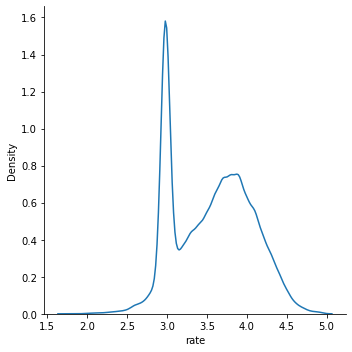

In [116]:
sns.displot(df, x="rate", kind="kde")

#### Almost 50% of restaurants gain ratings between 3.2 to 4.5, Ratings greater than 4.5 are very rare.

#### 2. Table Booking in Restaurants

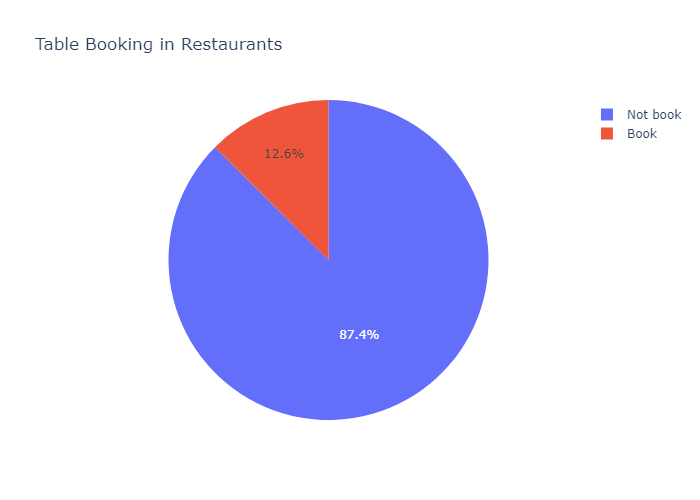

In [117]:
x=df['book_table'].value_counts()
labels=['Not book','Book']

fig = px.pie(df, values=x, names=labels, title='Table Booking in Restaurants')
fig.show("png")

#### 87.4% of restaurants do not provide table booking and only 12.6% of restaurants provide table booking.

#### 3. Online Orders in Restaurants

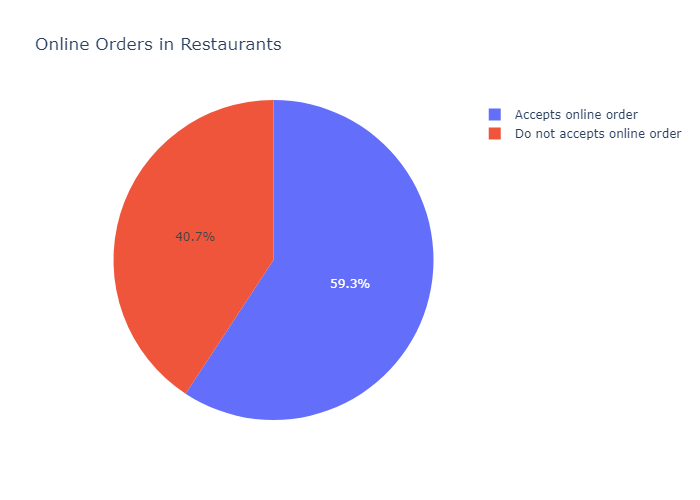

In [118]:
z=df['online_order'].value_counts()
labels=['Accepts online order','Do not accepts online order']

fig = px.pie(df, values=z, names=labels, title='Online Orders in Restaurants')
fig.show("png")

#### 59.3% Of Restaurants accepts online order, 40.7% of Restaurants do not accepts online order

#### 4. Top 20 Restaurants type in Bangalore 

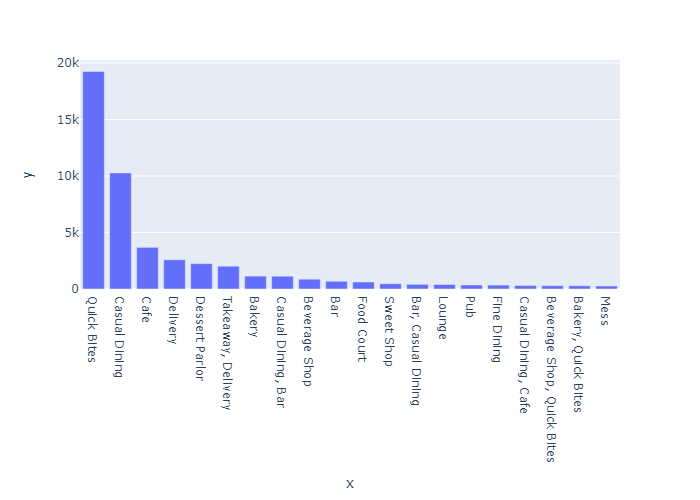

In [119]:
fig = px.bar(df, x=df['rest_type'].value_counts().nlargest(20).index, y=df['rest_type'].value_counts().nlargest(20))
fig.show("png")

#### Most of the people in Bangalore prefer Quick Bites type of Restaurant, because Bangalore is tech capital of India. 

#### 5. Top 20 Cuisines in Bangalore

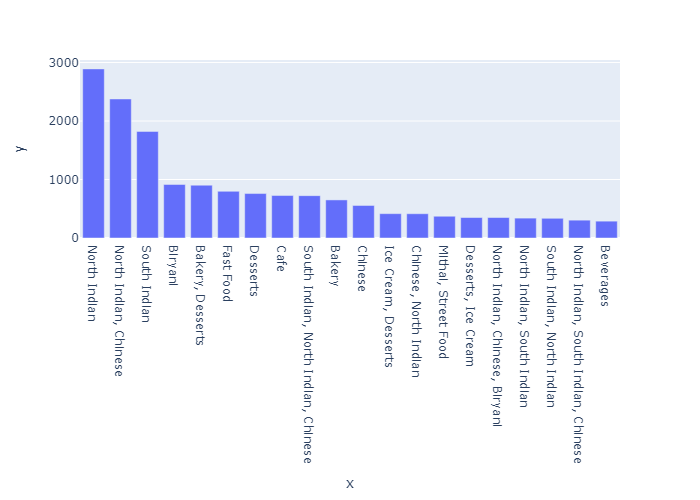

In [120]:
fig = px.bar(df, x=df['cuisines'].value_counts().nlargest(20).index, y=df['cuisines'].value_counts().nlargest(20))
fig.show("png")

#### Most of the people in Bangalore prefer North Indian Cuisines and next to that Chinese.

#### 6. Cost Distribution for 2 peoples

In [121]:
df.rename(columns = {'approx_cost(for two people)':'Approximate_Cost'}, inplace = True)

In [122]:
df['Approximate_Cost'] = df['Approximate_Cost'].astype('float')

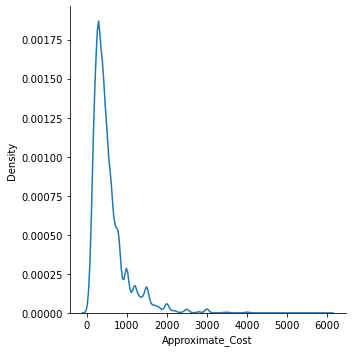

In [123]:
sns.displot(df, x="Approximate_Cost", kind="kde")

#### Approximate cost for 2 people for 90% of restaurant lies within 1000.

#### 7. Which type does customers loves the most?

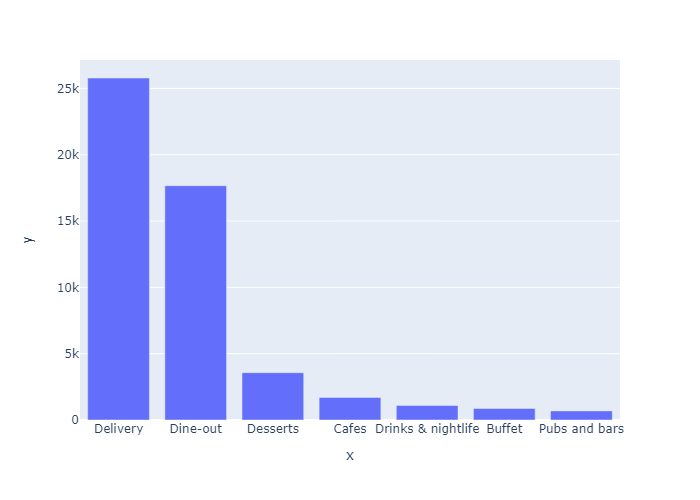

In [124]:
fig = px.bar(df, x=df['listed_in(type)'].value_counts().index, y=df['listed_in(type)'].value_counts())
fig.show("png")

#### 8. What are foodie areas?

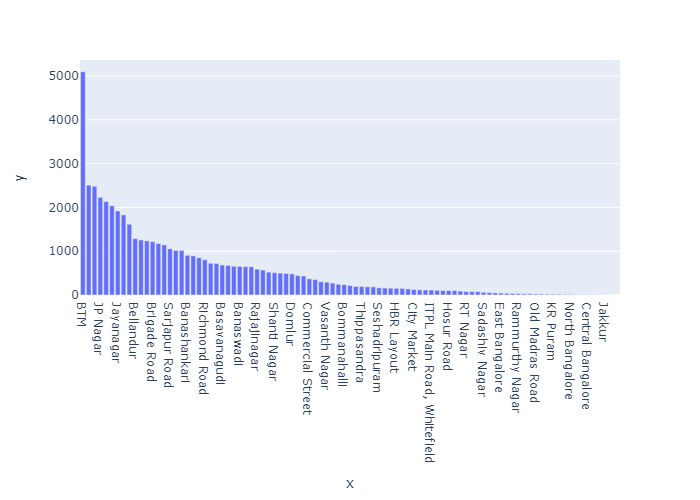

In [125]:
fig = px.bar(df, x=df['location'].value_counts().index, y=df['location'].value_counts())
fig.show("png")

#### Most of the people loves delivery type in Bangalore.

Inference from Univariate Analysis:

1. Almost 50% of restaurants in Bangalore gains the rating between 3.2 to 4.5. In rare case, there are restaurants with more      than 4.5 ratings.

2. 87.4% of Restaurants do not provide table booking.

3. 59.3% of Restaurants accepts online order.

4. Most of the people in Bangalore prefer Quick Bites type of Restaurants.

5. Most of the people likes North Indian cuisine and next to that Chinese cuisines.

6. Approximate cost for 2 people in 90% of Restaurant lies within 1000 Rupees.

7. Most of the people loves delivery type in Bangalore.


#### BIVARIATE ANALYSIS

#### 1. Top 20 Restaurants with Maximum Votes

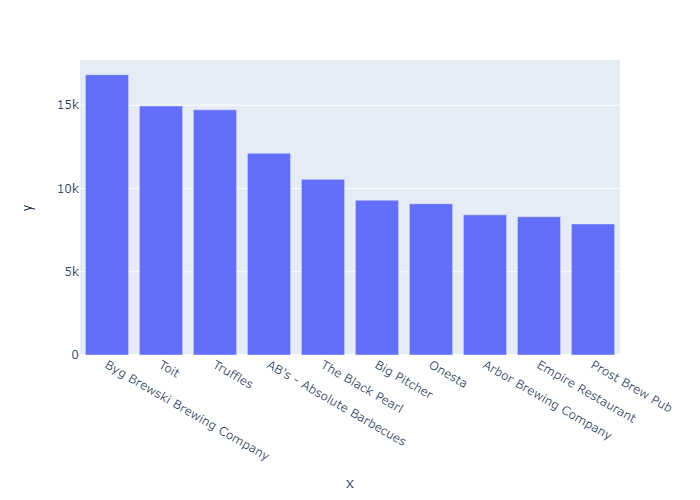

In [126]:
fig = px.bar(df, x=df.groupby('name')['votes'].max().nlargest(10).index, y=df.groupby('name')['votes'].max().nlargest(10))
fig.show("png")

#### 2. Total Number of Restaurants in each location in Bangalore

In [127]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 93, dtype: object

In [128]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [129]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,349
Jayanagar,352
Bannerghatta Road,447
JP Nagar,501
Indiranagar,522
Marathahalli,656
HSR,681
Electronic City,695
BTM,698


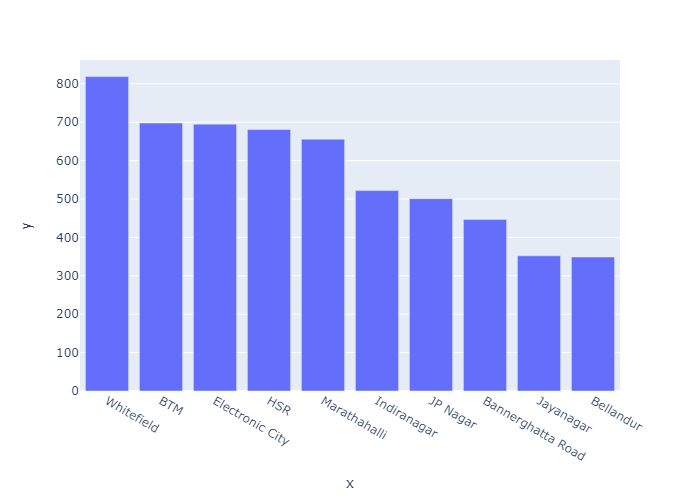

In [130]:
fig = px.bar(df_total, x=df_total['restaurant'].nlargest(10).index, y=df_total['restaurant'].nlargest(10))
fig.show("png")

#### Whitefield location has more number of restaurants and second highest is BTM location

#### 3. Ratings vs Approximate cost for two people

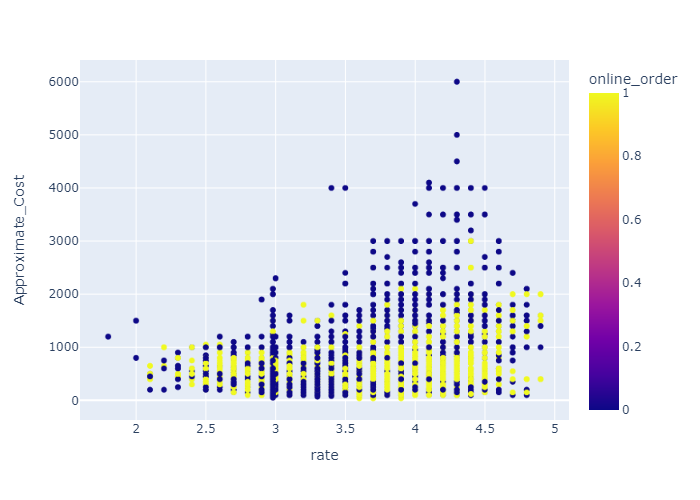

In [131]:
fig = px.scatter(df, x="rate", y="Approximate_Cost", color="online_order")
fig.show("png")

#### The above scatter plot represents that most of the high rated restaurants that accepts online order are budgetted too.

#### 4. Votes vs Online Orders

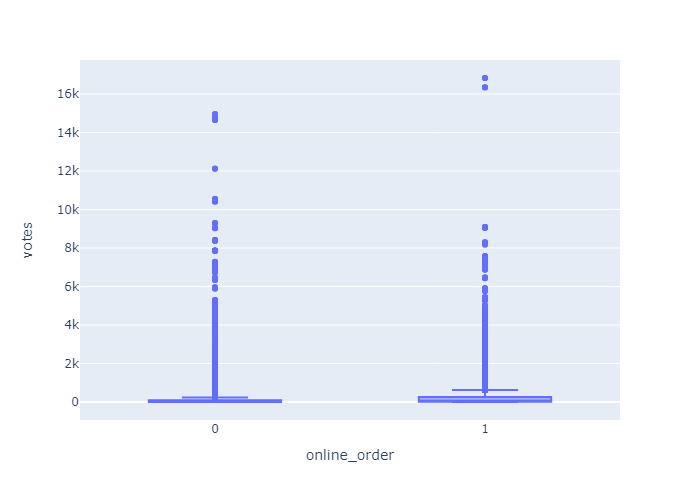

In [132]:
fig = px.box(df, x="online_order", y="votes")
fig.show("png")

#### From the above box plot, it can be observed that median value for both box vary. Restaurants which accepts online order get more votes than restaurant that do not accept online order.

#### 5. Approximate cost vs online orders

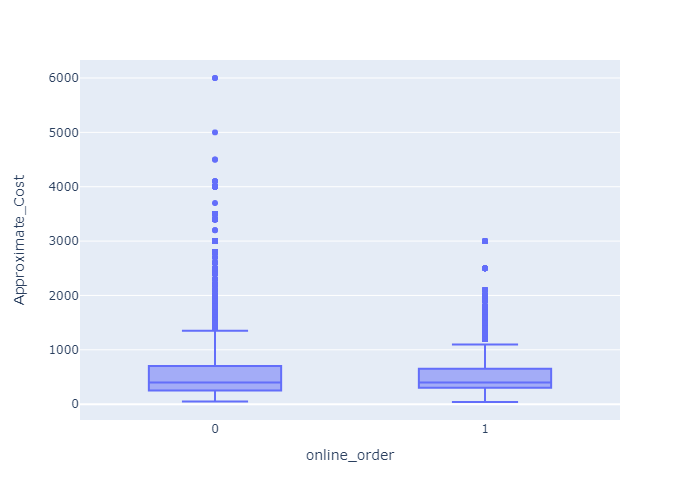

In [133]:
fig = px.box(df, x="online_order", y="Approximate_Cost")
fig.show("png")

#### Restaurant accepts online order: Approximate cost ranges from 40 to 3000
#### Restaurant do not accepts online order: Approximate cost ranges from 50 to 6000
#### Both box plot average value is 400.
#### Hence Restaurants accepting online orders are more affordable.

#### 6. Most Expensive restaurant 

In [134]:
df['Approximate_Cost'].max()

6000.0

In [135]:
df[df['Approximate_Cost']==6000].loc[:,('name','cuisines')]

,name,cuisines
19139,Le Cirque Signature - The Leela Palace,"French, Italian"
45618,Le Cirque Signature - The Leela Palace,"French, Italian"


#### 7. Most Cheapest Restaurant

In [136]:
df['Approximate_Cost'].min()

40.0

In [137]:
df[df['Approximate_Cost']==40].loc[:,('name','cuisines')]

,name,cuisines
5270,Srinidhi Sagar Food Line,"South Indian, North Indian, Chinese"
12232,Srinidhi Sagar Food Line,"South Indian, North Indian, Chinese"
14819,Srinidhi Sagar Food Line,"South Indian, North Indian, Chinese"
17773,Srinidhi Sagar,"South Indian, North Indian, Chinese"
18891,Srinidhi Sagar Food Line,"South Indian, North Indian, Chinese"
27091,Srinidhi Sagar Deluxe,"South Indian, North Indian, Chinese"
29785,Srinidhi Sagar Deluxe,"South Indian, North Indian, Chinese"
32485,Srinidhi Sagar,"South Indian, North Indian, Chinese"


#### 8. Top 10 most expensive restaurants in Bangalore

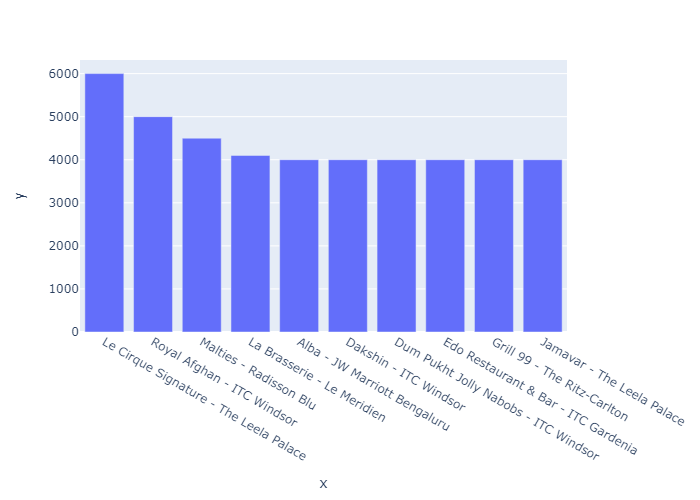

In [138]:
fig = px.bar(df, x=df.groupby('name')['Approximate_Cost'].max().nlargest(10).index, y=df.groupby('name')['Approximate_Cost'].max().nlargest(10))
fig.show("png")

#### 9. Top 10 most cheapest restaurants in Bangalore

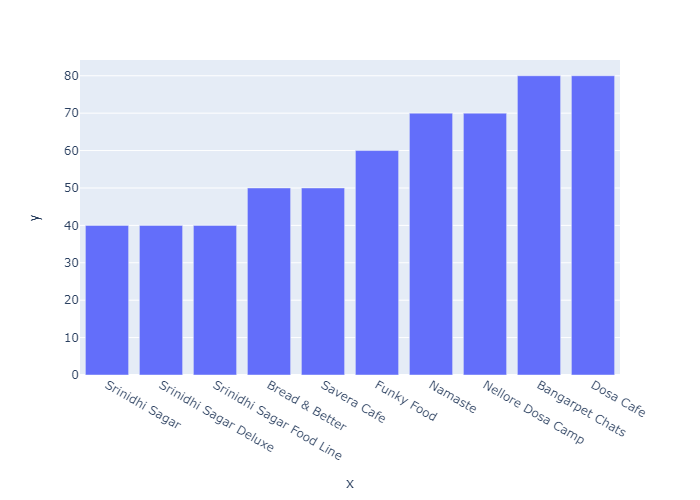

In [139]:
fig = px.bar(df, x=df.groupby('name')['Approximate_Cost'].min().nsmallest(10).index, y=df.groupby('name')['Approximate_Cost'].min().nsmallest(10))
fig.show("png")

#### 10. Top 10 Cheapest restaurant location wise

In [140]:
df.groupby('location')['Approximate_Cost'].min().nsmallest(10)

location
Domlur               40.0
Indiranagar          40.0
Old Airport Road     40.0
Bannerghatta Road    50.0
Shivajinagar         50.0
Electronic City      60.0
BTM                  70.0
Banashankari         80.0
JP Nagar             80.0
Kammanahalli         80.0
Name: Approximate_Cost, dtype: float64

#### 11. Restaurant that have better rating and also budgetted too

In [141]:
df[(df['rate']>=4) & (df['Approximate_Cost']<=500)].loc[:,('name','rate','rest_type','online_order','Approximate_Cost')]

,name,rate,rest_type,online_order,Approximate_Cost
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,4.1,Cafe,1,500.0
12,The Coffee Shack,4.2,Cafe,1,500.0
13,Caf-Eleven,4.0,Cafe,0,450.0
34,Faasos,4.2,Quick Bites,1,500.0
39,Maruthi Davangere Benne Dosa,4.0,Quick Bites,1,150.0
...,...,...,...,...,...
51329,Pita Pit,4.0,Quick Bites,1,500.0
51334,Faasos,4.0,Quick Bites,1,500.0
51345,The Wok Shop,4.2,Quick Bites,1,500.0
51376,nu.tree,4.2,Quick Bites,1,400.0


#### 12. Total Number of Restaurants that has better rating and budgetted too

In [142]:
df_new=df[(df['rate']>=4) & (df['Approximate_Cost']<=500)]
len(df_new['name'].unique())

628

#### 13. Finding Best Budget Restaurant in any location

In [143]:
def Budget_Restaurant(location, rest_type):
    budget = df[(df['Approximate_Cost']<=500) & (df['location']==location) & (df['rest_type']==rest_type) & (df['rate']>=4)]
    return(budget['name'].unique())

print(Budget_Restaurant('BTM','Quick Bites'))

['Hiyar Majhe Kolkata' 'Swadista Aahar' 'Swad Punjab Da' 'Roti Wala'
 'Litti Twist' 'The Shawarma Shop' 'Gorbandh' 'Yum In My Tum'
 'Nanna Munna Paratha House' 'Chaatimes' 'Andhra Kitchen' "Muthashy's"
 'Ashirvaad Grand' 'Petoo' 'Ilyazsab The House Of Chicken' 'Hungry Lee'
 'Kannur Food Point' "Domino's Pizza" 'Kesar Sweet Shop and Fast Food'
 'KFC' 'Hari Super Sandwich' 'The Biriyani Pedia' 'World Of Asia']


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### CORRELATION 

<AxesSubplot:>

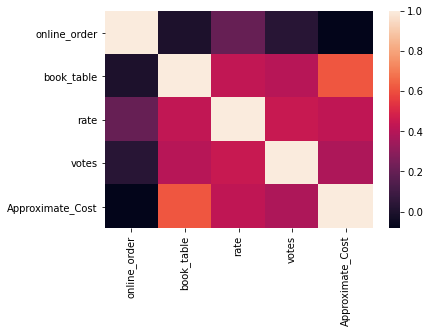

In [144]:
data = df.corr()
sns.heatmap(data=data)

In [145]:
data

,online_order,book_table,rate,votes,Approximate_Cost
online_order,1.000000,-0.002017,0.204463,0.034159,-0.083188
book_table,-0.002017,1.000000,0.432676,0.406176,0.618108
rate,0.204463,0.432676,1.000000,0.447136,0.426936
votes,0.034159,0.406176,0.447136,1.000000,0.381574
Approximate_Cost,-0.083188,0.618108,0.426936,0.381574,1.000000


In [146]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.100000,775.000000,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.100000,787.000000,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.800000,918.000000,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.700000,88.000000,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.800000,166.000000,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27.000000,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,2.981209,2.981209,Whitefield,Bar,Finger Food,600.0,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,2.981209,2.981209,Whitefield,Bar,Finger Food,2000.0,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236.000000,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### GEO SPATIAL ANALYSIS

#### Need Latitude and Longitude for Geographical Analysis

In [147]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [148]:
locations['New Name']='Bangalore '+locations['Name']

In [149]:
locations.head()

,Name,New Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [150]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [151]:
locations['geo_loc']=lat_lon

In [152]:
locations.head()

,Name,New Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


Now we have obtained latitude and longitude for each and every location in Bangalore... 

In [153]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [154]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,5098
1,HSR,2508
2,Koramangala 5th Block,2481
3,JP Nagar,2230
4,Whitefield,2133


#### Combine Both Data Frames

In [155]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,New Name,geo_loc
0,BTM,5098,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,HSR,2508,Bangalore HSR,"(18.1475, 41.538889)"
2,Koramangala 5th Block,2481,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)"
3,JP Nagar,2230,Bangalore JP Nagar,"(12.2655944, 76.6465404)"
4,Whitefield,2133,Bangalore Whitefield,"(44.3730577, -71.6118577)"


In [225]:
Restaurant_locations['geo_loc'][0][0]

45.95485055

In [226]:
Restaurant_locations['geo_loc'][0][1]

-112.49659530324134

In [227]:
def generateBaseMap(default_location=[12.97,77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map
basemap=generateBaseMap()

In [228]:
basemap

In [230]:
basemap.save("Map1.jpg")

In [160]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [161]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [162]:
Restaurant_locations.head()

,Name,count,New Name,geo_loc,lat,lon
0,BTM,5098,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,HSR,2508,Bangalore HSR,"(18.1475, 41.538889)",18.147500,41.538889
2,Koramangala 5th Block,2481,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)",12.934377,77.628415
3,JP Nagar,2230,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540
4,Whitefield,2133,Bangalore Whitefield,"(44.3730577, -71.6118577)",44.373058,-71.611858


In [163]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [164]:
basemap

1. From the above geographical map, it is observed that most of the restaurants are tend to concentrate in Central Bangalore

2. Only a very few restaurants are move away from Central Bangalore.

3. It will be very helpful for new restaurant opener or Entrepreneurs to come up with new idea and loction for their start ups.

#### 1. North Indian Cuisines through Geographical Map

In [165]:
df2= df[df['cuisines']=='North Indian']
df2.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
5,Timepass Dinner,1,0,3.800000,286.000000,Basavanagudi,Casual Dining,North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari
50,Petoo,0,0,3.700000,21.000000,Banashankari,Quick Bites,North Indian,450.0,"[('Rated 2.0', 'RATED\n This is a neatly made...",Delivery,Banashankari
72,Spicy Tandoor,0,0,2.981209,2.981209,Banashankari,Quick Bites,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",Delivery,Banashankari
87,Krishna Sagar,0,0,3.500000,31.000000,Banashankari,Quick Bites,North Indian,200.0,"[('Rated 1.0', 'RATED\n Worst experience with...",Delivery,Banashankari
94,Nandhini Deluxe,0,0,2.600000,283.000000,Banashankari,Casual Dining,North Indian,600.0,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",Delivery,Banashankari


In [166]:
north_india=df2.groupby(['location'],as_index=False)['name'].agg('count')
north_india.columns=['Name','count']
north_india.head()

,Name,count
0,BTM,328
1,Banashankari,38
2,Banaswadi,12
3,Bannerghatta Road,75
4,Basavanagudi,21


In [167]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [168]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)

In [169]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

#### 2. South Indian Cuisines through Geographical Map

In [170]:
df1= df[df['cuisines']=='South Indian']
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
39,Maruthi Davangere Benne Dosa,1,0,4.000000,17.000000,Banashankari,Quick Bites,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...",Delivery,Banashankari
41,Havyaka Mess,0,0,3.900000,28.000000,Banashankari,Mess,South Indian,300.0,"[('Rated 4.0', 'RATED\n Food is good.very hom...",Delivery,Banashankari
66,Namma Brahmin's Idli,1,0,3.600000,34.000000,Jayanagar,Quick Bites,South Indian,100.0,"[('Rated 4.0', 'RATED\n Quite a cosy & small ...",Delivery,Banashankari
76,Sri Guru Kottureshwara Davangere Benne Dosa,1,0,4.100000,558.000000,Basavanagudi,Quick Bites,South Indian,150.0,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...",Delivery,Banashankari
91,Sunsadm,0,0,2.981209,2.981209,Banashankari,"Takeaway, Delivery",South Indian,400.0,[],Delivery,Banashankari


In [171]:
South_india=df1.groupby(['location'],as_index=False)['name'].agg('count')
South_india.columns=['Name','count']
South_india.head()

,Name,count
0,BTM,113
1,Banashankari,86
2,Banaswadi,37
3,Bannerghatta Road,48
4,Basavanagudi,89


In [172]:
South_india=South_india.merge(locations,on="Name",how='left').dropna()

In [173]:
South_india['lan'],South_india['lon']=zip(*South_india['geo_loc'].values)

In [174]:
basemap=generateBaseMap()
HeatMap(South_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [175]:
df3= df[df['rest_type']=='Quick Bites']
df3.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
31,Foodiction,1,0,2.8,506.0,Banashankari,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",Delivery,Banashankari
34,Faasos,1,0,4.2,415.0,Banashankari,Quick Bites,"North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...",Delivery,Banashankari
36,Fast And Fresh,1,0,2.8,91.0,Banashankari,Quick Bites,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",Delivery,Banashankari
39,Maruthi Davangere Benne Dosa,1,0,4.0,17.0,Banashankari,Quick Bites,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...",Delivery,Banashankari


In [176]:
Quick=df3.groupby(['location'],as_index=False)['name'].agg('count')
Quick.columns=['Name','count']
Quick.head()

,Name,count
0,BTM,2747
1,Banashankari,431
2,Banaswadi,338
3,Bannerghatta Road,644
4,Basavanagudi,377


In [177]:
Quick=Quick.merge(locations,on="Name",how='left').dropna()

In [178]:
Quick['lan'],Quick['lon']=zip(*Quick['geo_loc'].values)

In [179]:
basemap=generateBaseMap()
HeatMap(Quick[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

Inference from above Geo Spatial Analysis

1. All the restaurants are tend to fall in central Bangalore.
2. very few restaurants are away from central Bangalore.
3. Mostly North Indian cuisine, South Indian Cuisine and Quick Bytes type of Restaurants are in same location in Bangalore.
4. This geographical analysis will help the new restaurant opener to find location and where all the restaurants lie and where do people visits the most etc...

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### SENTIMENT ANALYSIS

* Sentiment Analysis is really helpful for business and organization to know about their customers and their opinions and
  attitudes plays a major role.

* It is important to analyze customer opinions in order to run a successful business.

* There are many ways to express their opinions. Customers can express their opinions or suggestions through Ratings, Votings, Review section or they can hit a like or dislike etc..

* Hence analysing reviews and opinions from customers and taking actions according to that will really helps to improve business and also it will attract new customers.

In [180]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


#### Review Text Pre - Processing

In [181]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [182]:
data1=re.sub('[^a-zA-Z]',' ',data)
data1

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [183]:
data2=re.sub('rated',' ',data1)
data2

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [184]:
data3=re.sub('x',' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [185]:
re.sub(' +',' ',data3)

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

#### 1. Sentiment Analysis for Particular Restaurant type

In [186]:
stopwords=set(STOPWORDS)

In [187]:
def Restaurant_type(rest_type):
    dataset=df[df['rest_type']==rest_type]

    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)

    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, 
                    min_font_size = 10).generate(total_review) 

    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

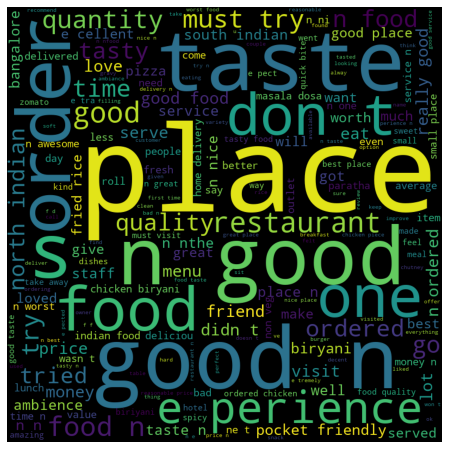

In [188]:
Restaurant_type("Quick Bites")

#### 2. Sentiment Analysis for Particular cuisines

In [189]:
def Cuisines(cuisines):
    dataset=df[df['cuisines']==cuisines]

    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)

    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, 
                    min_font_size = 10).generate(total_review) 

    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

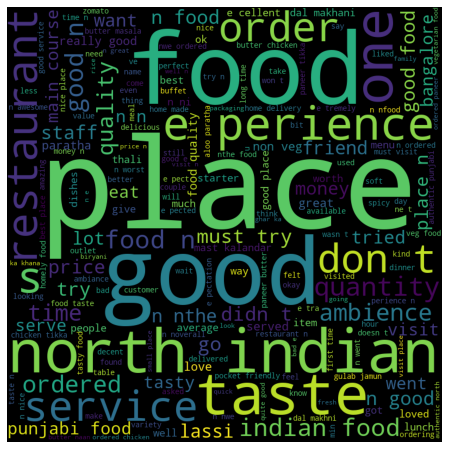

In [190]:
Cuisines("North Indian")

#### 3. Sentiment Analysis for Particular Restaurant

In [191]:
def Restaurant_Name(name):
    dataset=df[df['name']==name]

    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)

    wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, 
                    min_font_size = 10).generate(total_review) 

    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

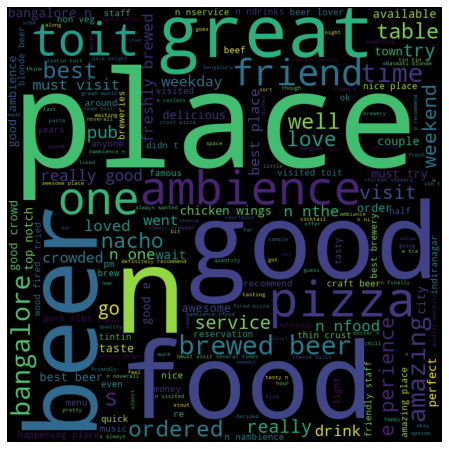

In [192]:
Restaurant_Name("Toit")

Inference from Sentiment Analysis

1. One way to visualize sentiment analysis is through Word Cloud.

2. Word Cloud is data visualization tool and it is used to analyze each and every word.

3. The size of each word depends upon the frequency, usage and words used.

4. If the word looks so big, then that word has been used many times by many people and it shows the powerfulness of word.

5. From the above sentiment analysis, the word cloud visualization is used for review list for different restaurant types, cuisines and for restaurants also.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### MACHINE LEARNING MODELS

In [193]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787.0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918.0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [194]:
data = df.copy()
data.drop('reviews_list',axis=1,inplace=True)
data.drop('listed_in(city)',axis=1,inplace=True)
data.drop('name',axis=1,inplace=True)
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['name','rate', 'cost', 'votes','Approximate_Cost'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(data)

In [195]:
zomato_en

,online_order,book_table,rate,votes,location,rest_type,cuisines,Approximate_Cost,listed_in(type)
0,0,0,4.100000,775.000000,0,0,0,800.0,0
1,0,1,4.100000,787.000000,0,0,1,800.0,0
2,0,1,3.800000,918.000000,0,1,2,800.0,0
3,1,1,3.700000,88.000000,0,2,3,300.0,0
4,1,1,3.800000,166.000000,1,0,4,600.0,0
...,...,...,...,...,...,...,...,...,...
51712,1,1,3.600000,27.000000,30,17,256,1500.0,6
51713,1,1,2.981209,2.981209,30,17,255,600.0,6
51714,1,1,2.981209,2.981209,30,17,255,2000.0,6
51715,1,0,4.300000,236.000000,64,17,255,2500.0,6


#### REGRESSION ANALYSIS

In [196]:
x = zomato_en.iloc[:,[0,1,3,4,5,6,7,8]]
y = zomato_en['rate']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

#### 1. Linear Regression

In [197]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
rmse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)

In [198]:
print('Intercept:', reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2_score)

Intercept: 3.6579747436401067
Root mean squared error:  0.15244641079337548
R2 score:  0.34044431635440453


#### 2. Decision Tree Regression

In [199]:
#Prepairng a Decision Tree Regression

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
rmse = mean_squared_error(y_test, y_predict)

In [200]:
print('Root mean squared error: ', rmse)

Root mean squared error:  0.02983406172979378


#### 3. Random Forest Regression

In [201]:
#Preparing a Random forest Regression

RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
rmse = mean_squared_error(y_test, y_predict)

In [202]:
print('Root mean squared error: ', rmse)

Root mean squared error:  0.02265926763582333


#### CLASSIFICATION 

In [203]:
X =  zomato_en.iloc[:,[1,2,3,4,5,6,7,8]]
y =  zomato_en['online_order']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### 1. Logistic Regression

In [204]:
clf = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      9171
           1       0.65      0.43      0.52      6241

    accuracy                           0.67     15412
   macro avg       0.66      0.63      0.64     15412
weighted avg       0.67      0.67      0.66     15412



In [208]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6736958214378407
Precision: 0.6454632741238598
Recall: 0.4308604390322064


#### 2. Decision Tree Classifier

In [209]:
dt_model = DecisionTreeClassifier(random_state=23)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [210]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9171
           1       0.86      0.87      0.86      6241

    accuracy                           0.89     15412
   macro avg       0.88      0.88      0.88     15412
weighted avg       0.89      0.89      0.89     15412



In [211]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

Accuracy: 0.8885284194134441
Precision: 0.8602835749561892
Recall: 0.8652459541740106


#### 3. Random Forest Classifier

In [212]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)
y_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_pred))

Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9171
           1       0.91      0.88      0.89      6241

    accuracy                           0.92     15412
   macro avg       0.91      0.91      0.91     15412
weighted avg       0.92      0.92      0.92     15412



In [213]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9158447962626525
Precision: 0.9090006618133686
Recall: 0.8803076430059286


#### 4. K- NEAREST NEIGHBOR

In [214]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_pred))

Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      9171
           1       0.81      0.77      0.79      6241

    accuracy                           0.84     15412
   macro avg       0.83      0.83      0.83     15412
weighted avg       0.84      0.84      0.84     15412



In [215]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8358422008824292
Precision: 0.812006053472339
Recall: 0.7737542060567216


Inference from Machine Learning Models

1. Regression

    1. Linear Regression
    2. Decision tree Regressor
    3. Random Forest Regressor

2. Classification

    1. Logistic Regression
    2. Decision tree classifier

Model Selection

    For Regression,
        
        1. Linear regression: 34%
        2. Decision tree regressor: 87%
        3. Random Forest Regressor: 90%
    
    For Classification,
    
        1. Logistic regression: 67%
        2. Decision tree classifier: 88%
        3. Random forest classifier: 91%
        4. K Nearest Neighbor: 83%

For both regression and classification, Random forest produces more accuracy of about 90%. Hence Random forest can be selected for both classification and regression.
    